In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [22]:
paths = list(Path("outputs/fedtrain/movielens").glob("fedmf64_svd*/hist.csv"))

In [23]:
paths

[PosixPath('outputs/fedtrain/movielens/fedmf64_svd2/hist.csv'),
 PosixPath('outputs/fedtrain/movielens/fedmf64_svd8/hist.csv'),
 PosixPath('outputs/fedtrain/movielens/fedmf64_svd4/hist.csv')]

In [24]:
# lora4_hist = pd.read_csv("pretrained/lora4/hist.csv")
# lora2_hist = pd.read_csv("pretrained/lora2/hist.csv")
# lora1_hist = pd.read_csv("pretrained/lora1/hist.csv")
# lora_hist  = pd.read_csv("pretrained/hist.bk1.csv")
# standard_hist = pd.read_csv("exp/ncf16/hist.csv")
standard_hist = pd.read_csv("/home/ubuntu/hieu.nn/IJCAI-23-PFedRec/FedNCF/outputs/fedtrain/movielens/fedmf64/hist.csv")
lora8_hist = pd.read_csv(paths[1])
lora4_hist = pd.read_csv(paths[2])
lora2_hist = pd.read_csv(paths[0])

# freeB_lora8_hist = pd.read_csv("exp/ml1m/bs128_lr3e-3/lora8_ncf16_freezeB/hist.csv")
# freeB_lora4_hist = pd.read_csv("exp/ml1m/bs128_lr3e-3/lora4_ncf16_freezeB/hist.csv")
# freeB_lora2_hist = pd.read_csv("exp/ml1m/bs128_lr3e-3/lora4_ncf16_freezeB/hist.csv")



# lora1_hist = pd.read_csv("pretrained/standard_lr2e-3_wd1e-2/hist.csv")
# lora2_hist = pd.read_csv("pretrained/standard_lr/hist.csv")

In [29]:
lora2_hist['comp_time'] = lora2_hist['set_parameters'] + lora2_hist['get_parameters']
lora4_hist['comp_time'] = lora4_hist['set_parameters'] + lora4_hist['get_parameters']
lora8_hist['comp_time'] = lora8_hist['set_parameters'] + lora8_hist['get_parameters']
standard_hist['comp_time'] = standard_hist['set_parameters'] + standard_hist['get_parameters']

In [30]:
standard_hist['comp_time'].mean()

0.029758982658386137

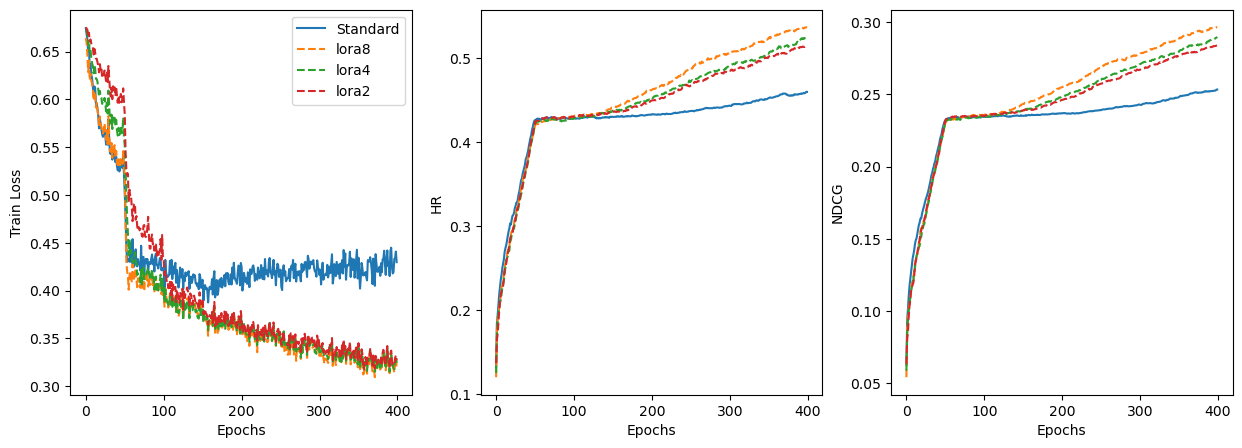

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def plot_metrics(df, label, style='--'):
    axes[0].plot(df["train_loss"], label=label, linestyle=style)
    axes[1].plot(df["HR"], label=label, linestyle=style)
    axes[2].plot(df["NDCG"], label=label, linestyle=style)
    axes[0].set_xlabel("Epochs")
    axes[1].set_xlabel("Epochs")
    axes[2].set_xlabel("Epochs")
    axes[0].set_ylabel("Train Loss")
    axes[1].set_ylabel("HR")
    axes[2].set_ylabel("NDCG")


plot_metrics(standard_hist, "Standard", style='-')
plot_metrics(lora8_hist, "lora8")
plot_metrics(lora4_hist, "lora4")
plot_metrics(lora2_hist, "lora2") 
# plot_metrics(lora1_hist, "lora1")
# plot_metrics(lora2_hist, "lora2", style='-')
# plot_metrics(freeB_lora2_hist, "freezeB_lora2")
# plot_metrics(lora4_hist, "lora4")


axes[0].legend()


In [20]:
standard_hist['train_loss'].min()

0.2330733725006545

In [8]:
# ===================================================================
#                      Kernel Shape Output Shape   Params Mult-Adds
# Layer                                                            
# 0_mf_embedding_user    [16, 6040]      [2, 16]   96.64k    96.64k
# 1_mf_embedding_item    [16, 3706]      [2, 16]  14.888k   59.296k
# 2_mlp_embedding_user   [32, 6040]      [2, 32]  193.28k   193.28k
# 3_mlp_embedding_item   [32, 3706]      [2, 32]  14.952k  118.592k
# 4_mlp.Linear_0           [64, 32]      [2, 32]    2.08k    2.048k
# 5_mlp.ReLU_1                    -      [2, 32]        -         -
# 6_mlp.Linear_2           [32, 16]      [2, 16]    528.0     512.0
# 7_mlp.ReLU_3                    -      [2, 16]        -         -
# 8_mlp.Linear_4            [16, 8]       [2, 8]    136.0     128.0
# 9_mlp.ReLU_5                    -       [2, 8]        -         -
# 10_output_layer           [24, 1]       [2, 1]     25.0      24.0
# -------------------------------------------------------------------
#                         Totals
# Total params          500.417k
# Trainable params      322.529k
# Non-trainable params  177.888k
# Mult-Adds              470.52k
# ===================================================================